In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/WOC ML Data/classification_train.csv')
a=data.to_numpy()
a

array([[    0,     8,     0, ...,     0,     0,     0],
       [    1,     4,     0, ...,     0,     0,     0],
       [    2,     1,     0, ...,     0,     0,     0],
       ...,
       [29997,     9,     0, ...,     0,     0,     0],
       [29998,     4,     0, ...,     0,     0,     0],
       [29999,     6,     0, ...,     0,     0,     0]])

In [4]:
a.shape

(30000, 786)

In [5]:
x_t=a[:,range(2,a.shape[1])]
y_t=a[:,1]
x_t

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
x_t.shape

(30000, 784)

In [7]:
y_t

array([8, 4, 1, ..., 9, 4, 6])

In [8]:
y_t.shape

(30000,)

In [9]:
set(y_t)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [10]:
def normalize(dta):
  n=dta.shape[1]
  mean=np.zeros(n)
  dev=np.zeros(n)
  for j in range(n):
    mean[j]=np.mean(dta[:,j])
    dev[j]=np.std(dta[:,j])
  dta=(dta-mean)/dev
  return dta,mean,dev

<function matplotlib.pyplot.show(close=None, block=None)>

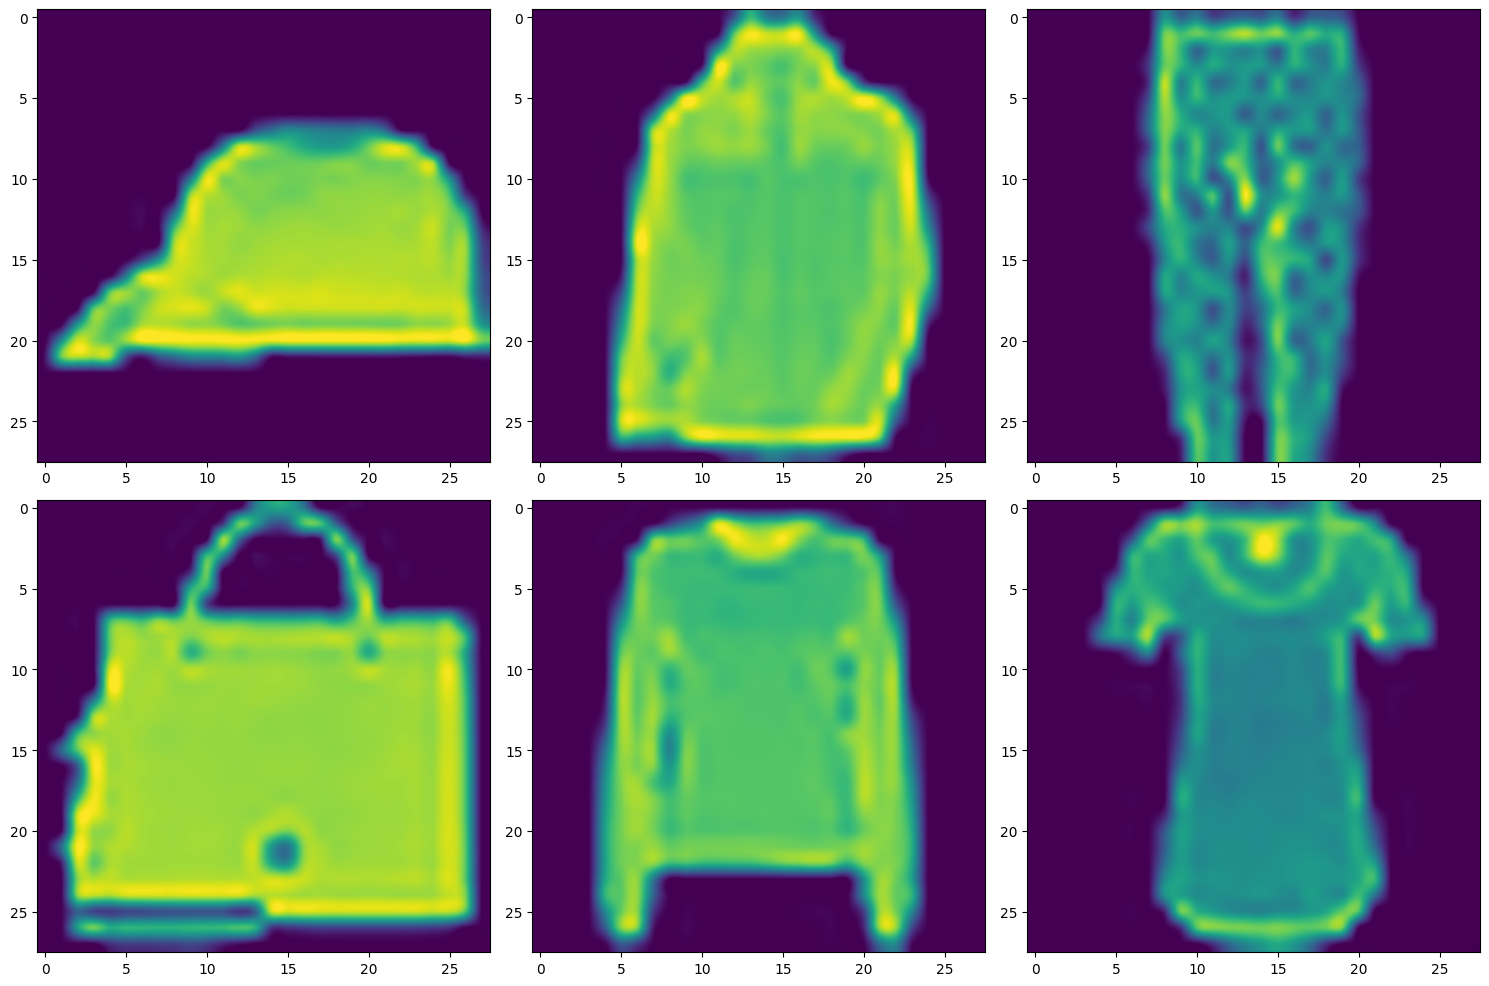

In [11]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
num=0
for i in range(2):
  for j in range(3):
    ax[i][j].imshow(x_t[num].reshape(28,28),interpolation='spline16')
    num+=1
plt.tight_layout()
plt.show

In [12]:
x_train,mean_t,dev_t=normalize(x_t)

In [13]:
x_train

array([[-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       ...,
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399]])

In [14]:
x_train.shape

(30000, 784)

<function matplotlib.pyplot.show(close=None, block=None)>

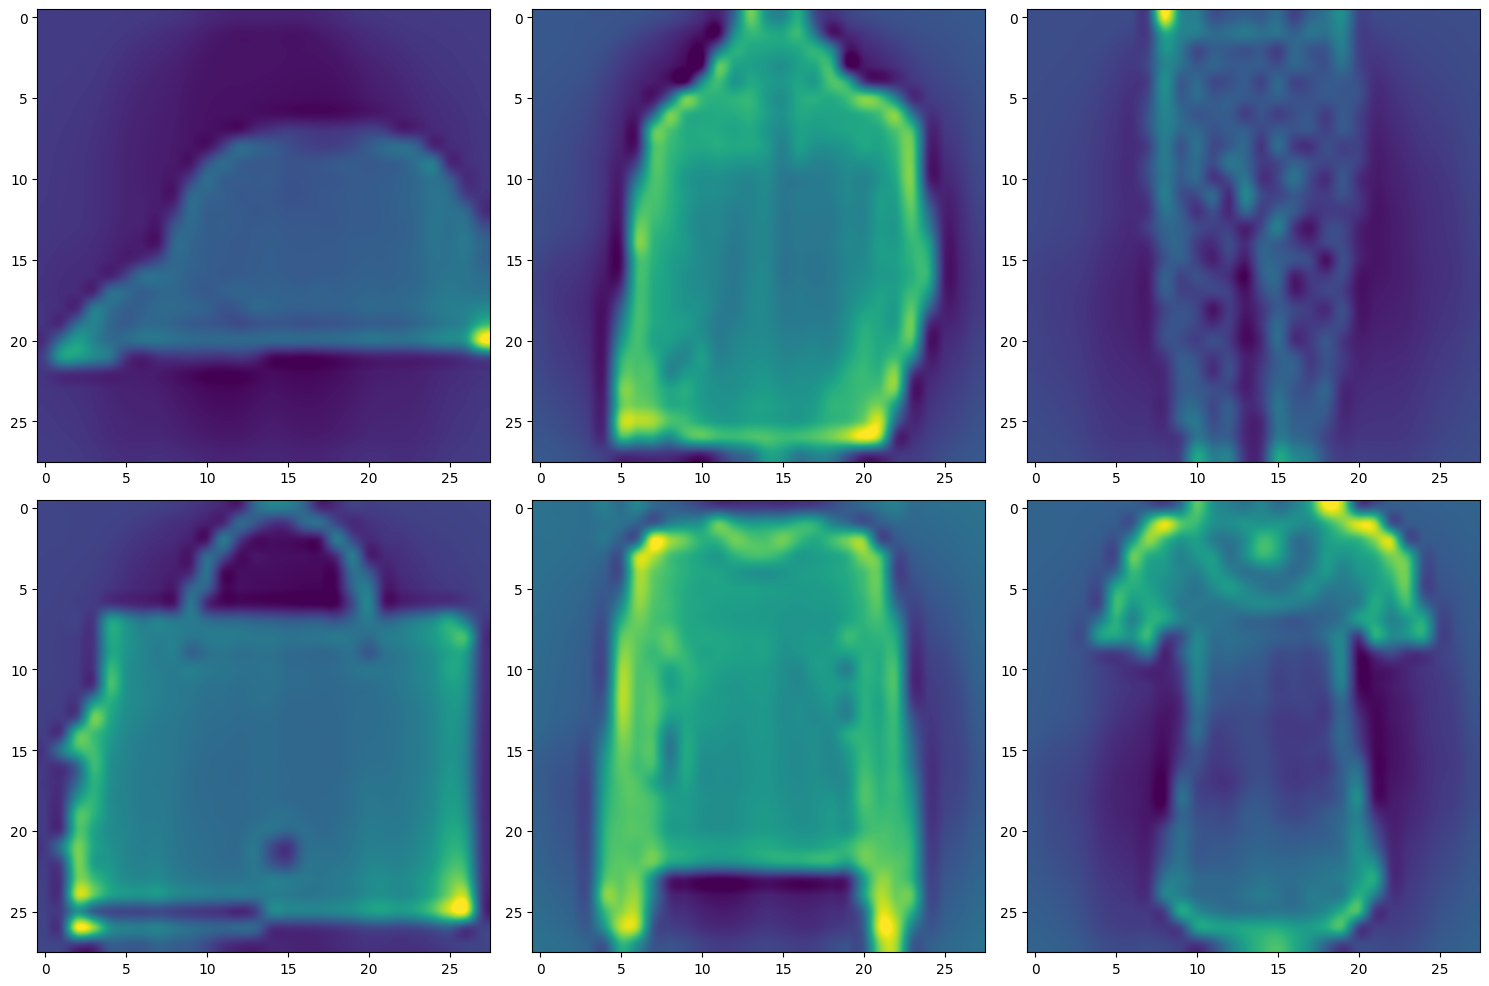

In [15]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
num=0
for i in range(2):
  for j in range(3):
    ax[i][j].imshow(x_train[num].reshape(28,28),interpolation='spline16')
    num+=1
plt.tight_layout()
plt.show

In [16]:
def transform(ar):
  op=np.zeros((10,ar.shape[0]))
  for i in range(ar.shape[0]):
    op[ar[i]][i]=1
  return op.T

In [17]:
y_train=transform(y_t)
print(y_train[range(5),:])

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
def predict(x,w,b):
  return 1/(1+np.exp(-(np.dot(x,w)+b)))

In [19]:
def compute_cost(x,y,w,b):
  p=predict(x,w,b)
  return -np.sum(y*np.log(p)+(1-y)*np.log(1-p))/x.shape[0]

In [20]:
def compute_gradient(x,y,w,b):
  p=predict(x,w,b)-y
  dj_db=np.sum((p),axis=0)/len(x)
  dj_dw=np.dot(x.T,p)/len(x)
  return dj_dw,dj_db

In [21]:
alpha=0.006
j_hist=[]
w_test=np.zeros((x_train.shape[1],10))
b_test=np.zeros(10)
print('Number of Iterations        Cost')
for i in range(1,1351):
  c=compute_cost(x_train,y_train,w_test,b_test)
  j_hist.append(c)
  tdj_dw,tdj_db=compute_gradient(x_train,y_train,w_test,b_test)
  w_test-=alpha*tdj_dw
  b_test-=alpha*tdj_db
  if(i/135 in range(11)):
    print('%11s'%i,'        ',c)

Number of Iterations        Cost
        135          4.700064156753328
        270          3.8887091830343854
        405          3.347810830697584
        540          2.9591627797460673
        675          2.667598245477146
        810          2.4419010520283213
        945          2.262775817420553
       1080          2.117636708851244
       1215          1.9979527590662902
       1350          1.8977593897806304


Text(0.5, 0, 'Number of Iterations')

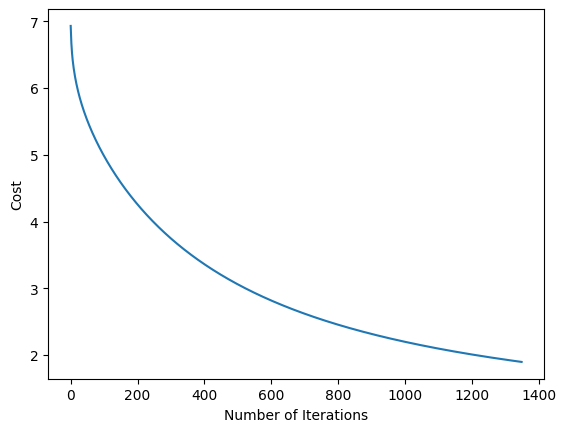

In [22]:
plt.plot(np.arange(len(j_hist)),j_hist)
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')

In [23]:
def pred_comp(x,w,b):
  return np.argmax(predict(x,w,b),axis=1)

In [24]:
tr=pred_comp(x_train,w_test,b_test)

In [25]:
np.mean(tr==y_t)*100

81.02000000000001

In [26]:
tr

array([7, 4, 1, ..., 9, 4, 0])

In [27]:
new_data=pd.read_csv('/content/drive/MyDrive/WOC ML Data/classification_test.csv')
new_a=new_data.to_numpy()
new_a

array([[25672,     0,     0, ...,     0,     0,     0],
       [59964,     0,     0, ...,     0,     0,     0],
       [66230,     0,     0, ...,     0,     0,     0],
       ...,
       [99226,     0,     0, ...,     0,     1,     0],
       [58519,     0,     1, ...,     0,     0,     0],
       [80458,     0,     0, ...,     0,     0,     0]])

In [28]:
new_a.shape

(10000, 785)

In [29]:
x_test=(new_a[:,range(1,785)]-mean_t)/dev_t

In [30]:
x_test

array([[-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399],
       ...,
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
         0.02139962, -0.03516399],
       [-0.01100826,  5.78804212,  2.98188066, ..., -0.15842376,
        -0.09071855, -0.03516399],
       [-0.01100826, -0.02635862, -0.03452104, ..., -0.15842376,
        -0.09071855, -0.03516399]])

In [31]:
y_test=pred_comp(x_test,w_test,b_test)
y_test

array([0, 1, 2, ..., 8, 6, 2])

<function matplotlib.pyplot.show(close=None, block=None)>

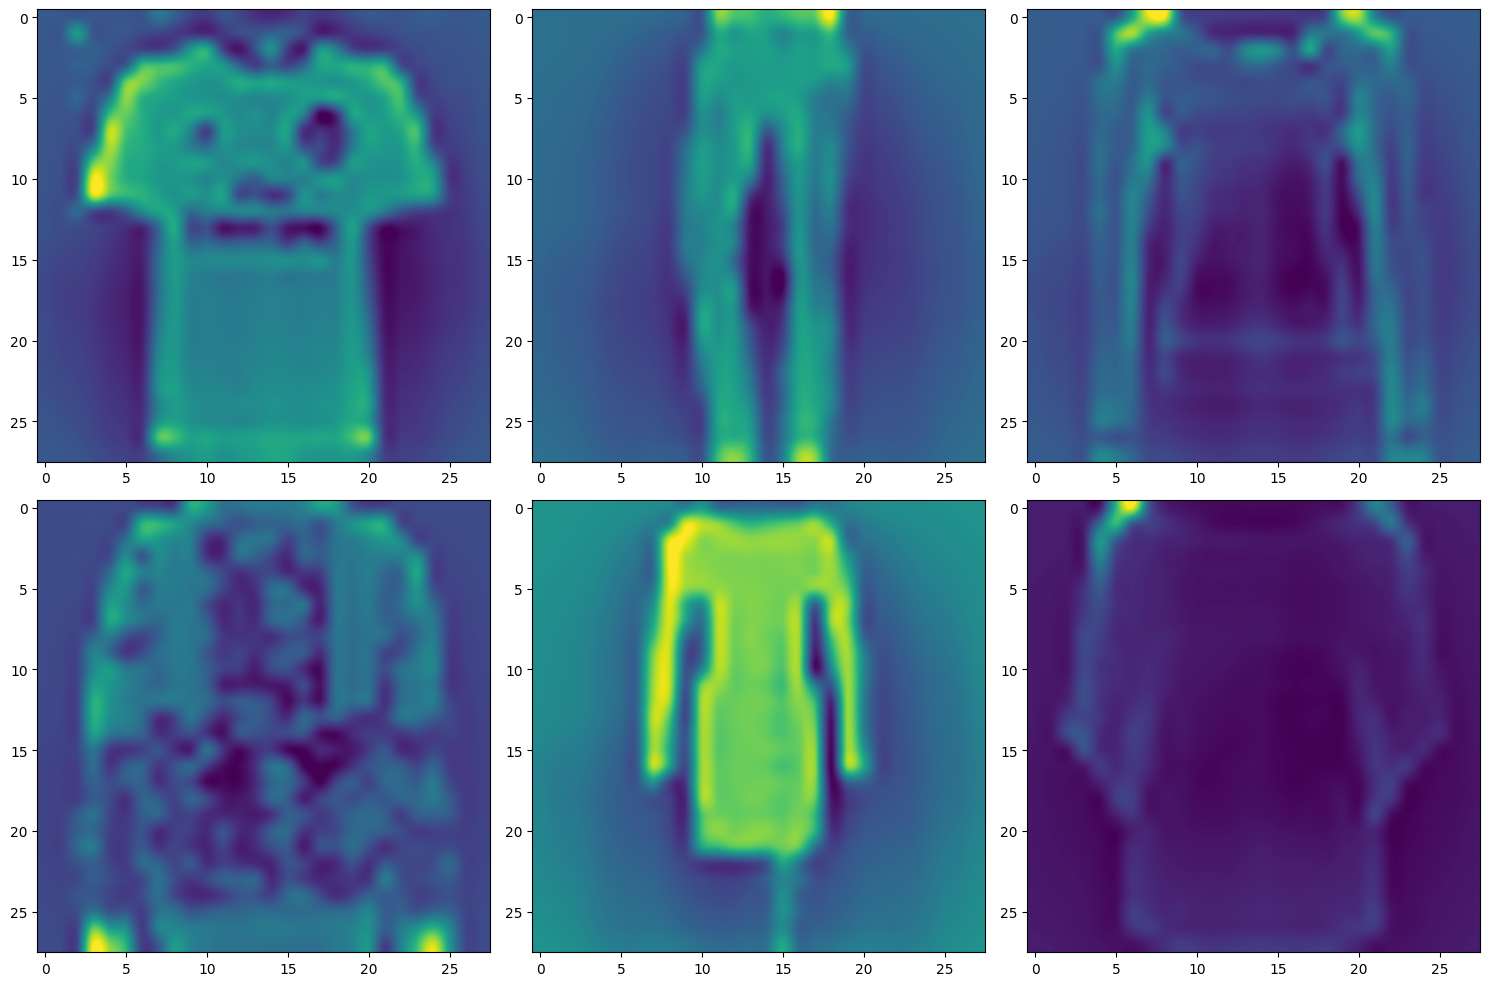

In [32]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
num=0
for i in range(2):
  for j in range(3):
    ax[i][j].imshow(x_test[num].reshape(28,28),interpolation='spline16')
    num+=1
plt.tight_layout()
plt.show

In [33]:
Predictions=new_data.drop(new_data.columns[[i for i in range(1,785)]], axis=1)
Predictions['Predicted']=y_test
Predictions.to_csv('/content/drive/MyDrive/WOC ML Data/Logistic_Predictions.csv', index=False)